In [27]:
from pdftojsonl import process_pdfs

process_pdfs('c:\\tools\\code\\ResumeAnalytics\\Candidate Resumes', 'candidate.jsonl')
process_pdfs('c:\\tools\\code\\ResumeAnalytics\\Target Resumes', 'target.jsonl')


In [28]:
import json
with open('candidate.jsonl', 'r') as cf, open('target.jsonl', 'r') as tf:
  candidate = [json.loads(line) for line in cf]
  target = [json.loads(line) for line in tf]

In [29]:
mashed_target = ''
for t in target:
  mashed_target += t['content']
target = [{'name':'target', 'content': mashed_target}]

In [30]:
import main
d = main.similarity(target, candidate)

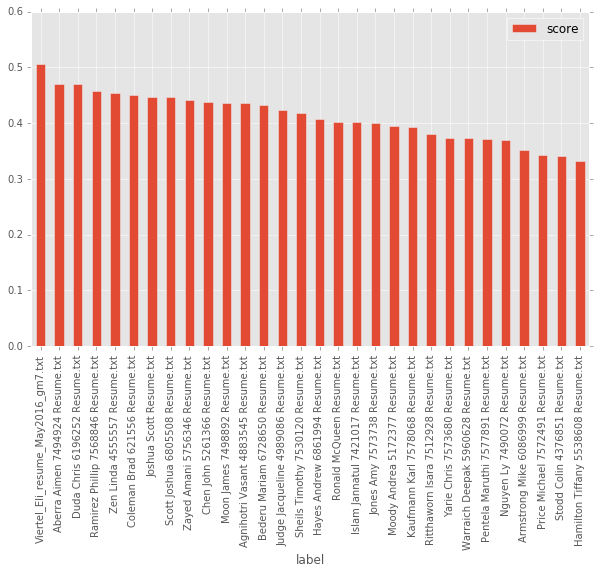

In [31]:
%matplotlib inline
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

result = []
for i in range(len(candidate)):
    result.append((candidate[i]['name'], d[0, i]))
result = sorted(result, key=lambda x: x[1], reverse=True)

df = pd.DataFrame(result, columns=['label', 'score'])
df[:50].plot(kind='bar', x='label', y='score');